In [1]:
# 引入所需要的全部包
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
path = 'datas\household_power_consumption.txt' ## 全部数据
path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names2=df.columns
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0,how = 'any') # 只要有数据为空，就进行删除操作
# how {any, 只要有nan就删除； all， 一行或者一列中所有元素都是nan就删除}

系数、模型参数 [0.         0.         3.97781449 0.87333465 0.17064799 0.        ]
准确率: 0.48506578175142084
准确率: 0.5870946833621569


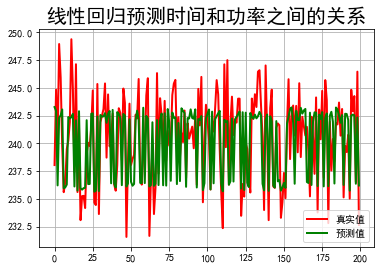

In [5]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values

# 对数据集进行测试集合训练集划分 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
#ss.fit(X_train) # 计算sigma， mu
# X_train = ss.transform(X_train)
X_train = ss.fit_transform(X_train) # 训练并转换

X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# -------------------------------以上是数据处理部分--------------------------

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print('系数、模型参数', lr.coef_)
# 模型效果
print("准确率:",lr.score(X_test, Y_test))
print("准确率:",lr.score(X_train, Y_train))

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#网格
plt.show()

1阶，系数为： [ 2.39926650e+02  0.00000000e+00 -1.11022302e-16  3.97781449e+00
  8.73334650e-01  1.70647992e-01  0.00000000e+00]
2阶，系数为： [ 1.23998300e+02  1.42108547e-14 -1.42108547e-14  5.34497071e+01
  2.95068077e+00  2.69407641e-01 -8.88178420e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.02461452e+02 -2.50100464e+01
 -5.18469319e-01  0.00000000e+00 -1.02427364e+01 -4.65982219e-01
  0.00000000e+00 -3.55472266e-02  0.00000000e+00  0.00000000e+00]
3阶，系数为： [ 6.60990985e+10  4.35722219e+09 -6.82110794e+09  2.01478239e+11
  1.34368619e+10  2.52025814e+09  1.18031226e+09  1.02502834e+09
  1.03581207e+09 -1.70072281e+09  1.98766600e+09  3.30056947e+09
 -1.20892857e+09 -2.87370174e+09 -1.35028796e+08  2.99113414e+09
  6.80385211e+08 -6.10351562e-05 -1.58013789e+11 -5.41420465e+09
 -1.01550447e+09  0.00000000e+00  1.09787178e+00  3.40980530e-01
  0.00000000e+0

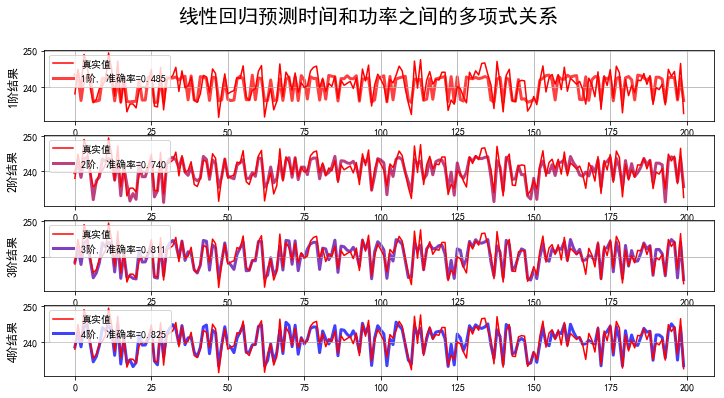

In [6]:
## 时间和电压之间的关系(Linear-多项式)
models = [
    Pipeline([
            ('Poly', PolynomialFeatures(degree=3)), # 给定进行多项式扩展操作
            ('Linear', LinearRegression(fit_intercept=False))
        ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) # 阶
m = d_pool.size
clrs = [] # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c))
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')#创建一个绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1) #  画子图
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    model.set_params(Poly__degree=d) ## 设置多项式的阶乘
    model.fit(X_train, Y_train)
    lin = model.get_params()['Linear']

    output = u'%d阶，系数为：' % d
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
#     if hasattr(lin, 'l1_ratio_'):
#         idx = output.find(u'系数')
#         output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
    print (output, lin.coef_.ravel())
    
    y_hat = model.predict(X_test)
    # 在计算R2
    s = model.score(X_test, Y_test)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()